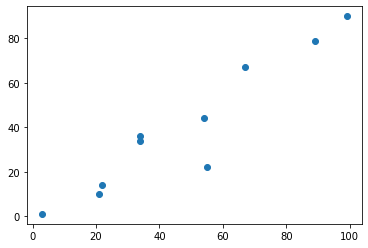

In [1]:
#Data preparation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = [3,21,22,34,54,34,55,67,89,99]
x = np.array(x)
y = [1,10,14,34,44,36,22,67,79,90]
y = np.array(y)
plt.scatter(x,y)#draw

[0.42658431]
[0.8057593]
[0.55796384] [0.80760965] 176.6292311522218


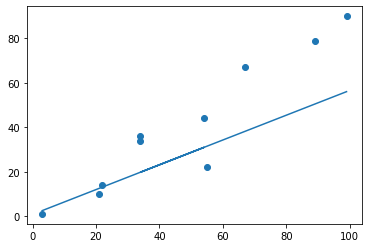

In [2]:
def model(a, b, x):
    return a*x + b

def loss_function(a, b, x, y):#linear regression aX+b
    num = len(x)
    prediction=model(a,b,x)
    return (0.5/num) * (np.square(prediction-y)).sum()

def optimize(a,b,x,y):#update a,b parameter
    num = len(x)
    prediction = model(a,b,x)
    da = (1.0/num) * ((prediction -y)*x).sum()
    db = (1.0/num) * ((prediction -y).sum())
    a = a - Lr*da
    b = b - Lr*db
    return a, b

def iterate(a,b,x,y,times):#reyurne a,b
    for i in range(times):
        a,b = optimize(a,b,x,y)
    return a,b  

#nitialization and Iterative optimization model:step 1 first iteration
a = np.random.rand(1)
print(a)
b = np.random.rand(1)
print(b)
Lr = 1e-4
a,b = iterate(a,b,x,y,1)
prediction=model(a,b,x)
loss = loss_function(a, b, x, y)
print(a,b,loss)
plt.scatter(x,y)
plt.plot(x,prediction)

[0.70990235] [0.8096231] 75.93367778333894


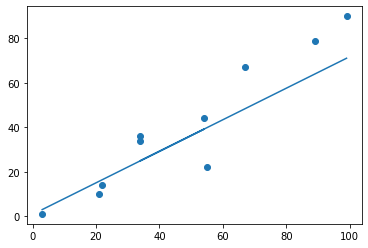

In [3]:
#step 2:second iteration:-
a,b = iterate(a,b,x,y,2)
prediction=model(a,b,x)
loss = loss_function(a, b, x, y)
print(a,b,loss)
plt.scatter(x,y)
plt.plot(x,prediction)

[0.80134912] [0.81056565] 50.283558449741136


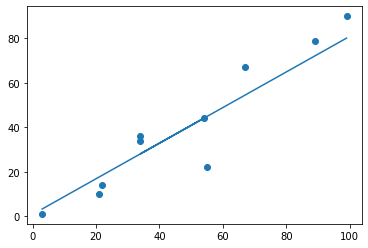

In [4]:
#step 2: third iteration :-
a,b = iterate(a,b,x,y,3)
prediction=model(a,b,x)
loss = loss_function(a, b, x, y)
print(a,b,loss)
plt.scatter(x,y)
plt.plot(x,prediction)

[0.83528798] [0.81048278] 47.446239390434144


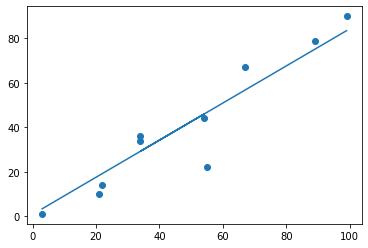

In [5]:
#step4 :  fourth iteration
a,b = iterate(a,b,x,y,4)
prediction=model(a,b,x)
loss = loss_function(a, b, x, y)
print(a,b,loss)
plt.scatter(x,y)
plt.plot(x,prediction)

[0.84348196] [0.80985812] 47.30229639137009


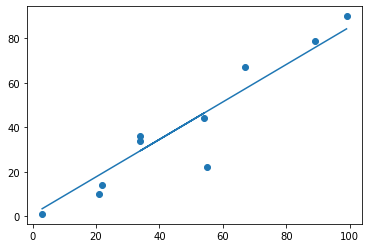

In [6]:
# fifth iteration
a,b = iterate(a,b,x,y,5)
prediction=model(a,b,x)
loss = loss_function(a, b, x, y)
print(a,b,loss)
plt.scatter(x,y)
plt.plot(x,prediction)

[0.86491847] [-0.5018489] 45.56729950087839


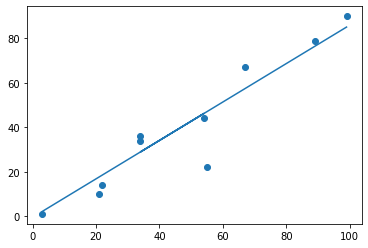

In [7]:
#10000th iteration,
a,b = iterate(a,b,x,y,10000)
prediction=model(a,b,x)
loss = loss_function(a, b, x, y)
print(a,b,loss)
plt.scatter(x,y)
plt.plot(x,prediction)

In [8]:
import pandas as pd
import math
import numpy as np

In [15]:
df = pd.read_csv('data.csv')
df

Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
..        ...    ...       ...       ...
164        60    105       140     290.8
165        60    110       145     300.0
166        60    115       145     310.2
167        75    120       150     320.4
168        75    125       150     330.4

[169 rows x 4 columns]

In [16]:
algorithm = 'Regression'
algorithm = 'Classification'

dataset_features = dict()

num_of_columns = df.shape[1]-1
for i in range(0, num_of_columns):
    column_name = df.columns[i]
    dataset_features[column_name] = df[column_name].dtypes

root = 1

if algorithm == 'Regression':
    if df['Decision'].dtypes=='object':
        raise ValueError('dataset wrong')

if df['Decision'].dtypes!='object':        
    algorithm = 'Regression'
    global_stdev = df['Decision'].std(ddof=0)

KeyError: 'Decision'

In [17]:
# This function is used to handle numeric characteristics
def processContinuousFeatures(cdf, column_name, entropy):
    # Numerical features are arranged in order
    unique_values = sorted(cdf[column_name].unique())
    
    subset_ginis = [];
    subset_red_stdevs = []
    
    for i in range(0, len(unique_values) - 1):
        threshold = unique_values[i]
        # Find the segmentation result if the first number is used as the threshold
        subset1 = cdf[cdf[column_name] <= threshold]
        subset2 = cdf[cdf[column_name] > threshold]
        # Calculate the proportion occupied by dividing the two parts
        subset1_rows = subset1.shape[0]
        subset2_rows = subset2.shape[0]
        total_instances = cdf.shape[0]
        # In the text feature part, entropy is calculated by using the cycle,
        # and in the numeric part, entropy is calculated by using the two groups after segmentation,
        # and the degree of entropy reduction is obtained
        if algorithm == 'Classification':
            decision_for_subset1 = subset1['Decision'].value_counts().tolist()
            decision_for_subset2 = subset2['Decision'].value_counts().tolist()
        
            gini_subset1 = 1;
            gini_subset2 = 1

            for j in range(0, len(decision_for_subset1)):
                gini_subset1 = gini_subset1 - math.pow((decision_for_subset1[j] / subset1_rows), 2)

            for j in range(0, len(decision_for_subset2)):
                gini_subset2 = gini_subset2 - math.pow((decision_for_subset2[j] / subset2_rows), 2)

            gini = (subset1_rows / total_instances) * gini_subset1 + (subset2_rows / total_instances) * gini_subset2

            subset_ginis.append(gini)
        
        # Take standard deviation as the judgment basis, calculate the decrease value of standard deviation at this time
        elif algorithm == 'Regression':
            superset_stdev = cdf['Decision'].std(ddof=0)
            subset1_stdev = subset1['Decision'].std(ddof=0)
            subset2_stdev = subset2['Decision'].std(ddof=0)
        
            threshold_weighted_stdev = (subset1_rows / total_instances) * subset1_stdev + (subset2_rows / total_instances) * subset2_stdev
            threshold_reducted_stdev = superset_stdev - threshold_weighted_stdev
            subset_red_stdevs.append(threshold_reducted_stdev)
        
    #Find the index of the split value
    if algorithm == "Classification":
        winner_one = subset_ginis.index(min(subset_ginis))
    elif algorithm == "Regression":
        winner_one = subset_red_stdevs.index(max(subset_red_stdevs))
    # Find the corresponding value according to the index
    winner_threshold = unique_values[winner_one]
    # Converts the original data column to an edited string column.
    # Characters smaller than the threshold are modified with the <= threshold value
    cdf[column_name] = np.where(cdf[column_name] <= winner_threshold, "<=" + str(winner_threshold),">" + str(winner_threshold))
    return cdf

In [18]:
# This function calculates the entropy of the column, and the input data must contain the Decision column
def calculateEntropy(df):
    # The regression tree entropy is 0
    if algorithm == 'Regression':
        return 0
    
    rows = df.shape[0]
    # Use Value_counts to get all values stored as dictionaries, keys: finds keys, and Tolist: change to lists.
    # This line of code finds the tag value.
    decisions = df['Decision'].value_counts().keys().tolist()
    
    entropy = 0
    # Here the loop traverses all the tags
    for i in range(0, len(decisions)):
        # Record the number of times the tag value appears
        num_of_decisions = df['Decision'].value_counts().tolist()[i]
        # probability of occurrence
        class_probability = num_of_decisions / rows
        # Calculate the entropy and sum it up
        entropy = entropy - class_probability * math.log(class_probability, 2)
    
    return entropy

In [19]:
# The main purpose of this function is to traverse the entire column of the table,
# find which column is the best split column, and return the name of the column
def findDecision(ddf):
    # If it's a regression tree, then you take the standard deviation of the true value
    if algorithm == 'Regression':
        stdev = ddf['Decision'].std(ddof=0)
    # Get the entropy of the decision column
    entropy = calculateEntropy(ddf)
    
    columns = ddf.shape[1];
    rows = ddf.shape[0]
    # Used to store Gini and standard deviation values
    ginis = [];
    reducted_stdevs = []
    # Traverse all columns and calculate the relevant indexes of all columns according to algorithm selection
    for i in range(0, columns - 1):
        column_name = ddf.columns[i]
        column_type = ddf[column_name].dtypes
        # Determine if the column feature is a number, and if so, process the data using the following function,
        # which modifies the data to a string type category on return.
        # The idea is to directly use character characteristics, continuous digital characteristics into discrete character characteristics
        if column_type != 'object':
            ddf = processContinuousFeatures(ddf, column_name, entropy)
        # The statistical data in this column can be obtained, and the continuous data can be directly classified after processing,
        # and the categories are less than the threshold and greater than the threshold
        classes = ddf[column_name].value_counts()
        gini = 0;
        weighted_stdev = 0
        # Start the loop with the type of data in the column
        for j in range(0, len(classes)):
            current_class = classes.keys().tolist()[j]
            # The final classification result corresponding to the data is selected
            # by deleting the value of the df column equal to the current data
            subdataset = ddf[ddf[column_name] == current_class]
            
            subset_instances = subdataset.shape[0]
            # The entropy of information is calculated here
            if algorithm == 'Classification': # GINI index
                decision_list = subdataset['Decision'].value_counts().tolist()
                
                subgini = 1
                
                for k in range(0, len(decision_list)):
                    subgini = subgini - math.pow((decision_list[k] / subset_instances), 2)
            
                gini = gini + (subset_instances / rows) * subgini
            # The regression tree is judged by the standard deviation,
            # and the standard deviation of the subclasses in this column is calculated here
            elif algorithm == 'Regression':
                subset_stdev = subdataset['Decision'].std(ddof=0)
                weighted_stdev = weighted_stdev + (subset_instances / rows) * subset_stdev
    
        # Used to store the final value of this column
        if algorithm == "Classification":
            ginis.append(gini)
        # Store the decrease in standard deviation for all columns
        elif algorithm == 'Regression':
            reducted_stdev = stdev - weighted_stdev
            reducted_stdevs.append(reducted_stdev)
    
    # Determine which column is the first branch
    # by selecting the index of the largest value from the list of evaluation indicators
    if algorithm == "Classification":
        winner_index = ginis.index(min(ginis))
    elif algorithm == "Regression":
        winner_index = reducted_stdevs.index(max(reducted_stdevs))
    winner_name = ddf.columns[winner_index]
    
    return winner_name

In [20]:
# ROOT is a number used to generate ' 'to adjust the display format of the decision making process
def formatRule(root):
    resp = ''
    
    for i in range(0, root):
        resp = resp + ' '
    
    return resp

In [21]:
# With this function, you build the decision tree model,
# entering data in dataframe format, the root value, and the file address
# If the value in the column is literal, it branches directly by literal category
def buildDecisionTree(df, root):
    # Identify the different charForResp
    charForResp = "'"
    if algorithm == 'Regression':
        charForResp = ""
    
    tmp_root = root * 1
    
    df_copy = df.copy()
    # Output the winning column of the decision tree, enter a list,
    # and output the column name of the decision column in the list
    winner_name = findDecision(df)
    
    # Determines whether the winning column is a number or a character
    numericColumn = False
    if dataset_features[winner_name] != 'object':
        numericColumn = True
    
    # To ensure the integrity of the original data and prevent the data from changing,
    # mainly to ensure that the data of other columns besides the winning column does not change,
    # so as to continue the branch in the next step.
    columns = df.shape[1]
    for i in range(0, columns - 1):
        column_name = df.columns[i]
        if df[column_name].dtype != 'object' and column_name != winner_name:
            df[column_name] = df_copy[column_name]
    # Find the element in the branching column
    classes = df[winner_name].value_counts().keys().tolist()
    # Traversing all classes in the branch column has two functions:
    # 1. Display which class is currently traversed to; 2. Determine whether the current class is already leaf node
    for i in range(0, len(classes)):
        # Find the Subdataset as in FindDecision, but discard this column of the current branch
        current_class = classes[i]
        subdataset = df[df[winner_name] == current_class]
        # At the same time, the data of the first branch column is discarded and the remaining data is processed
        subdataset = subdataset.drop(columns=[winner_name])
        # Edit the display situation. If it is a numeric feature, the character conversion has been completed when searching for branches.
        #If it is not a character feature, it is displayed with column names
        if numericColumn == True:
            compareTo = current_class # current class might be <=x or >x in this case
        else:
            compareTo = " == '" + str(current_class) + "'"
        
        terminateBuilding = False
        
        # -----------------------------------------------
        # This determines whether it is already the last leaf node
        if len(subdataset['Decision'].value_counts().tolist()) == 1:
            final_decision = subdataset['Decision'].value_counts().keys().tolist()[0] # all items are equal in this case
            terminateBuilding = True
        # At this time, only the Decision column is left, that is, all the segmentation features have been used
        elif subdataset.shape[1] == 1:
            # get the most frequent one
            final_decision = subdataset['Decision'].value_counts().idxmax()
            terminateBuilding = True
        # The regression tree is judged as leaf node if the number of elements is less than 5
        #elif algorithm == 'Regression' and subdataset.shape[0] < 5: # pruning condition
        # Another criterion is to take the standard deviation as the criterion and the sample mean in the node as the value of the node
        elif algorithm == 'Regression' and subdataset['Decision'].std(ddof=0)/global_stdev < 0.4:
            # get average
            final_decision = subdataset['Decision'].mean()
            terminateBuilding = True

        # -----------------------------------------------
        # Here we begin to output the branching results of the decision tree.。

        print(formatRule(root), "if ", winner_name, compareTo, ":")

        # -----------------------------------------------
        # check decision is made
        if terminateBuilding == True:
            print(formatRule(root + 1), "return ", charForResp + str(final_decision) + charForResp)
        else: # decision is not made, continue to create branch and leafs
            # The size of the indent at display represented by root
            root = root + 1
            # Call this function again for the next loop
            buildDecisionTree(subdataset, root)
    
        root = tmp_root * 1

In [22]:
# call 
buildDecisionTree(df, root)

KeyError: 'Decision'